In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("topSubscribed.csv", encoding = 'latin1')
#dataset source: https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels
data.head(10)

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012
5,6,Music,"118,000,000",0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
6,7,PewDiePie,"111,000,000","28,851,883,250","4,694",Gaming,2010
7,8,â¿ Kids Diana Show,"106,000,000","86,638,570,921","1,056",People & Blogs,2015
8,9,Like Nastya,"104,000,000","87,202,935,675",754,People & Blogs,2016
9,10,Gaming,"93,300,000",0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013


In [2]:
data.isnull().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [3]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [4]:
data.shape

(1000, 7)

In [5]:
data.nunique() 

Rank               1000
Youtube Channel     999
Subscribers         282
Video Views         992
Video Count         857
Category             19
Started              18
dtype: int64

In [6]:
data.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [30]:
data = data.replace(',','', regex=True)  
data[['Subscribers','Video Views','Video Count']] = data[['Subscribers','Video Views','Video Count']].astype(int)
data.dtypes

Rank                int64
Youtube Channel    object
Subscribers         int64
Video Views         int64
Video Count         int64
Category           object
Started             int64
dtype: object

In [32]:
data['Category'].value_counts() 

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

In [33]:
data = data[data.Category != 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels']
data['Category'].value_counts()

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

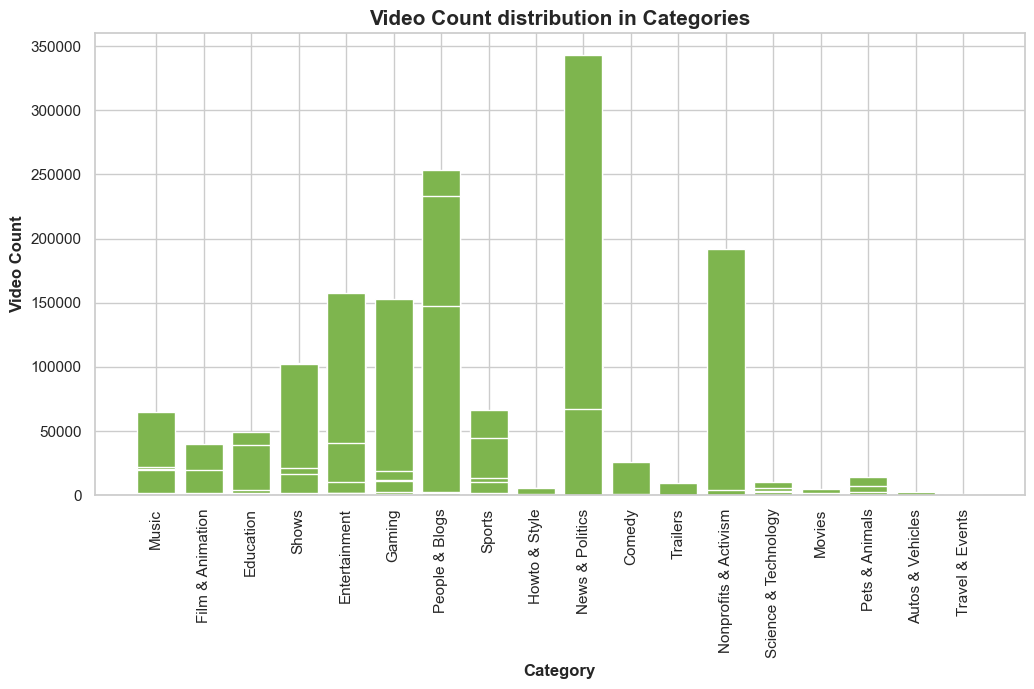

In [110]:
plt.figure(figsize=(12,6))
plt.bar(data['Category'],data['Video Count'], color="#7eb54e")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=12,fontweight="bold")
plt.ylabel("Video Count",fontsize=12,fontweight="bold")
plt.savefig('category_bar.png')
plt.title("Video Count distribution in Categories",fontsize=15, fontweight="bold")
sns.set()
plt.show()

In [34]:
categories = data['Category'].value_counts()
categories = categories.head(10)
categories

Entertainment           238
Music                   217
People & Blogs          132
Gaming                   94
Comedy                   68
Film & Animation         50
Education                45
Howto & Style            43
News & Politics          27
Science & Technology     18
Name: Category, dtype: int64

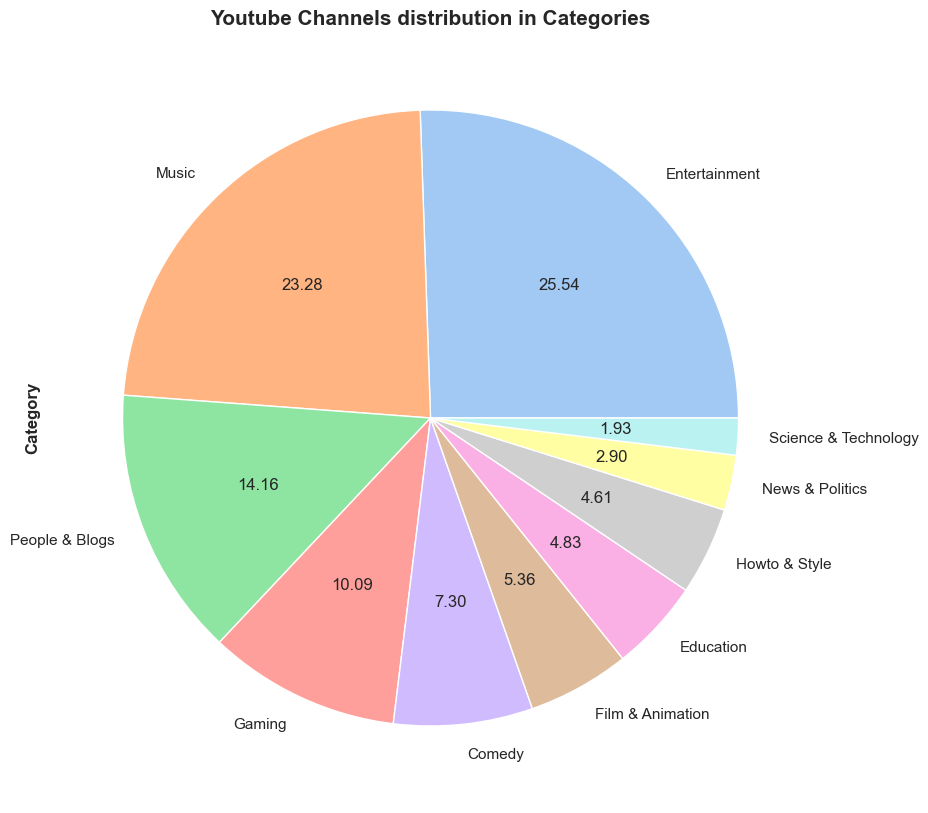

In [113]:
categories.plot(kind='pie', figsize=(18, 10), autopct='%1.2f',colors=sns.color_palette('pastel'))
plt.ylabel("Category",fontsize=12,fontweight="bold")
plt.title("Youtube Channels distribution in Categories",fontsize=15, fontweight="bold")
plt.savefig('category_pie.png')

In [27]:
subs_to_views = px.scatter(data_frame = data, x="Subscribers", y="Video Views", size="Video Views", trendline="ols", title="Relation between Subscribers and Video Views")
subs_to_views.show()

In [51]:
videos_to_views = px.scatter(data_frame = data, x="Video Count", y="Video Views", size="Video Views", trendline="ols", title="Relation between Video Count and Video Views")
videos_to_views.show()

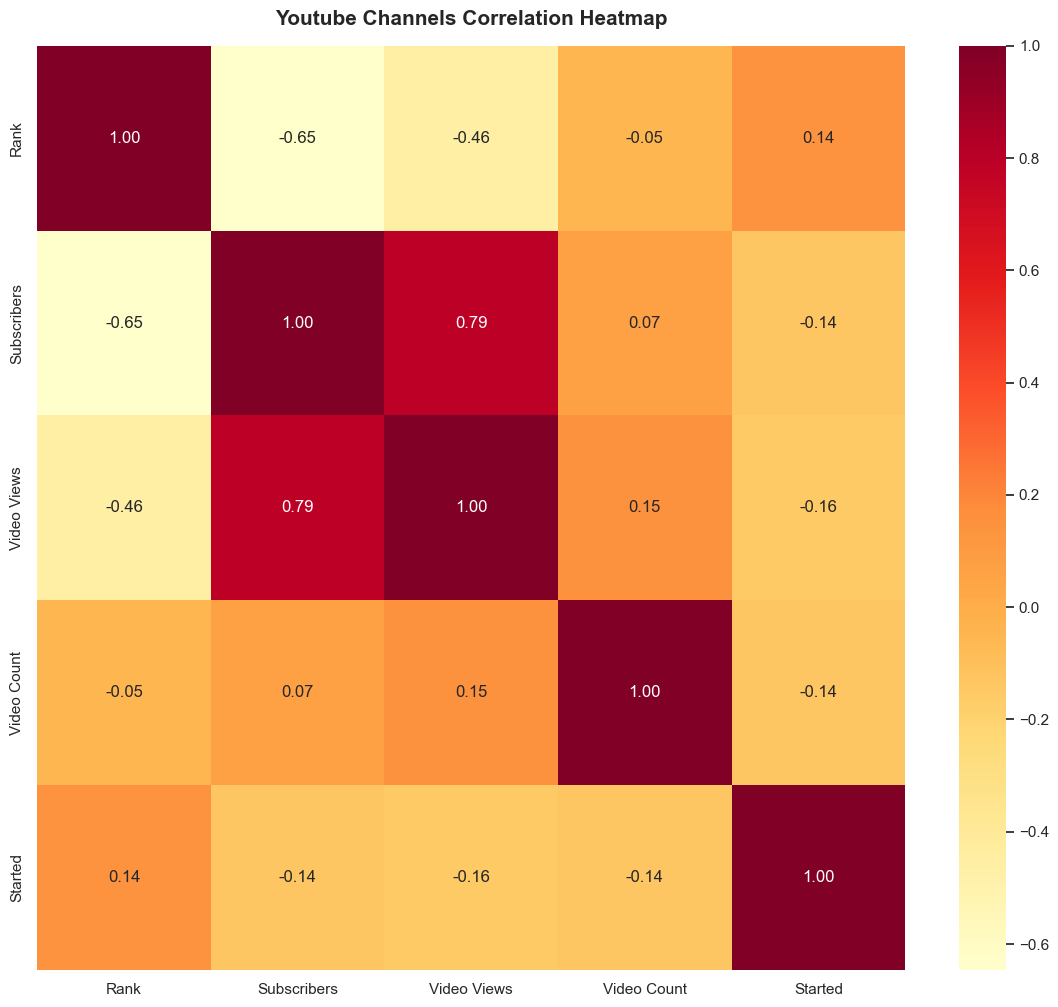

In [114]:
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(data.corr(), annot = True, cmap= 'YlOrRd', fmt= '.2f')
heatmap.set_title("Youtube Channels Correlation Heatmap", pad = 15, fontsize=15, fontweight="bold")
plt.savefig('heatmap.png')
plt.show()

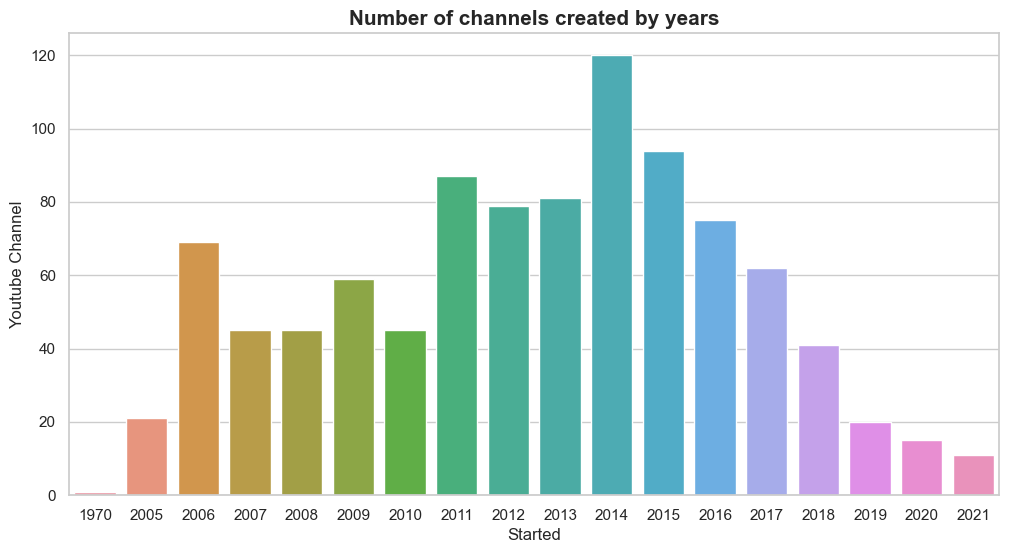

In [117]:
started_count = data.groupby("Started").count()
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = started_count.index , y = 'Youtube Channel' , data= started_count)
plt.title("Number of channels created by years",fontsize=15, fontweight="bold")
plt.savefig('started_count.png')

In [88]:
most_subscribers = data.groupby(['Youtube Channel']).sum()['Subscribers'].reset_index()
most_subscribers.sort_values(by=['Subscribers'], ascending=False, inplace=True)
most_subscribers = most_subscribers.head(10)
most_subscribers.sort_values(by=['Subscribers'], ascending=True, inplace=True)
most_subscribers

,Youtube Channel,Subscribers
830,Vlad and Niki,92700000
840,WWE,92800000
439,Like Nastya,104000000
964,â¿ Kids Diana Show,106000000
606,PewDiePie,111000000
534,MrBeast,128000000
662,SET India,150000000
152,Cocomelon - Nursery Rhymes,152000000
869,YouTube Movies,161000000
725,T-Series,234000000


In [121]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=most_subscribers['Youtube Channel'], y=most_subscribers['Subscribers'])])
fig.update_layout(title="Top 10 Youtube Channels with Most Subscribers", xaxis_title="Channels",
    yaxis_title="Subscribers")
fig.show()

In [100]:
most_views = data.groupby(['Youtube Channel']).sum()['Video Views'].reset_index()
most_views.sort_values(by=['Video Views'], ascending=False, inplace=True)
most_views = most_views.head(10)
most_views.sort_values(by=['Video Views'], ascending=True, inplace=True)
most_views

,Youtube Channel,Video Views
159,Colors TV,57825649653
532,Movieclips,59493925856
830,Vlad and Niki,72444118381
840,WWE,73577695222
964,â¿ Kids Diana Show,86638570921
439,Like Nastya,87202935675
707,Sony SAB,91117292875
662,SET India,137828094104
152,Cocomelon - Nursery Rhymes,149084178448
725,T-Series,212900271553


In [120]:
fig = go.Figure([go.Bar(x=most_views['Youtube Channel'], y=most_views['Video Views'])])
fig.update_layout(title="Top 10 Youtube Channels with Most Views", xaxis_title="Channels",
    yaxis_title="Views")
fig.show()

In [119]:
most_videos = data.groupby(['Youtube Channel']).sum()['Video Count'].reset_index()
most_videos.sort_values(by=['Video Count'], ascending=False, inplace=True)
most_videos = most_videos.head(10)
most_videos.sort_values(by=['Video Count'], ascending=True, inplace=True)
most_videos

,Youtube Channel,Video Count
20,ABS-CBN Entertainment,185775
564,News24,186542
733,TEDx Talks,191506
759,Thairath Online,225893
740,TV9 Bharatvarsh,233127
31,Aaj Tak,233730
390,KOMPASTV,245453
18,ABP NEWS,253628
342,IndiaTV,254217
276,GMA News,342802


In [118]:
fig = go.Figure([go.Bar(x=most_videos['Youtube Channel'], y=most_videos['Video Count'])])
fig.update_layout(title="Top 10 Youtube Channels with Most Videos", xaxis_title="Channels",
    yaxis_title="Videos")
fig.show()